In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np


In [2]:
raw_imdb = pd.read_csv('imdb_movies.csv')
raw_imdb

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US


In [3]:

imdb_genres = raw_imdb[['names', 'genre', 'budget_x']]
imdb_genres['genre'] = imdb_genres['genre'].str.split(r',\s*')
imdb_genres = imdb_genres.explode('genre').reset_index(drop=True)
imdb_genres

/var/folders/57/8yr9qn3s45sc5vk_srfp2yv80000gn/T/ipykernel_97207/2821348395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_genres['genre'] = imdb_genres['genre'].str.split(r',\s*')


,names,genre,budget_x
0,Creed III,Drama,75000000.0
1,Creed III,Action,75000000.0
2,Avatar: The Way of Water,Science Fiction,460000000.0
3,Avatar: The Way of Water,Adventure,460000000.0
4,Avatar: The Way of Water,Action,460000000.0
...,...,...,...
26405,Darkman II: The Return of Durant,Thriller,116000000.0
26406,Darkman II: The Return of Durant,Horror,116000000.0
26407,The Swan Princess: A Royal Wedding,Animation,92400000.0
26408,The Swan Princess: A Royal Wedding,Family,92400000.0


In [4]:
imdb_genres.groupby('genre')['budget_x'].agg(['max', 'min', 'mean'])

,max,min,mean
genre,,,
Action,460000000.0,100.0,7.102606e+07
Adventure,460000000.0,22.0,7.976701e+07
Animation,264940000.0,35.0,8.713107e+07
Comedy,264940000.0,5.0,6.234946e+07
Crime,340000000.0,7225.0,5.250985e+07
Documentary,264000000.0,22.0,9.386028e+07
Drama,264940000.0,1.0,5.673131e+07
Family,264940000.0,6.0,7.891962e+07
Fantasy,379000000.0,100.0,7.763372e+07


In [5]:
imdb_genres

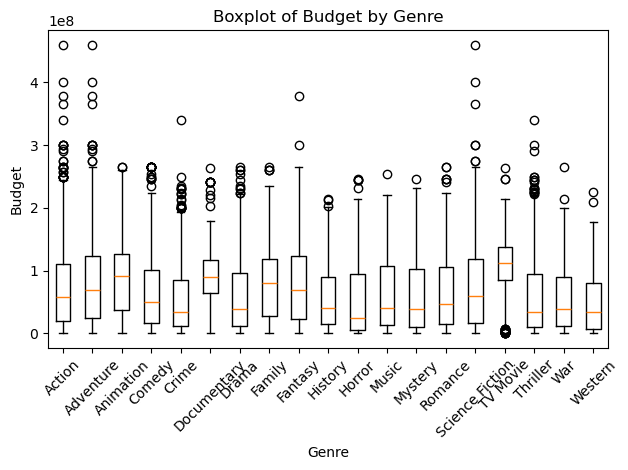

In [12]:

#boxplot 

#data preparation for boxplot
grouped_genres = imdb_genres.groupby('genre')['budget_x'].apply(list) 
genres_list = grouped_genres.index.tolist()
genres_data_to_plot = [grouped_genres[genre] for genre in genres_list]

#boxplot preparation
fig, ax = plt.subplots()
ax.boxplot(genres_data_to_plot, labels=genres_list)
ax.set_xlabel('Genre')
ax.set_ylabel('Budget')
ax.set_title('Boxplot of Budget by Genre')
plt.xticks(rotation = 45)
plt.tight_layout()


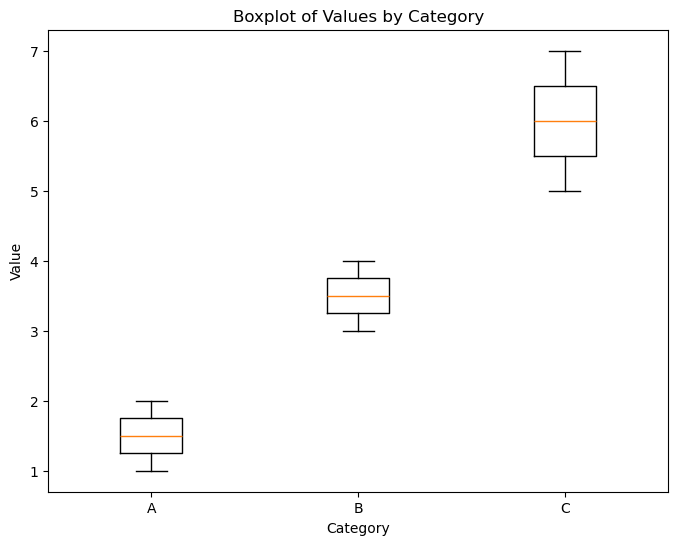

In [2]:
# Sample data
data = {
    'Category': ['A', 'A', 'B', 'B', 'C', 'C', 'C'],
    'Value': [1, 2, 3, 4, 5, 6, 7]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Group data by 'Category' and get lists of 'Value's
grouped_data = df.groupby('Category')['Value'].apply(list)

# Prepare data for plotting
categories = grouped_data.index.tolist()
data_to_plot = [grouped_data[cat] for cat in categories]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the boxplot
ax.boxplot(data_to_plot, labels=categories)

# Set labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Value')
ax.set_title('Boxplot of Values by Category')

# Show the plot
plt.show()

In [4]:
data_to_plot

[[1, 2], [3, 4], [5, 6, 7]]

In [ ]:
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'A': ['row1', 'row2', 'row3'],
    'B': [[1, 2, 3], [4, 5], [6, 7, 8]]
})

# Use explode to split list items into separate rows
df_exploded = df.explode('B')

print(df_exploded)